## Mesyella/2201793281

# Fashion Dataset on CNN

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sn
import pandas as pd

d:\python 3.6.8\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\python 3.6.8\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\python 3.6.8\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\python 3.6.8\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
num_classes=10
y_train = tf.keras.utils.to_categorical(y_train, num_classes) 
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# CNN Model

In [4]:
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(tf.keras.layers.Dropout(0.25)) 
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.5)) 
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [5]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(), metrics=['accuracy'])

# Training

In [6]:
train = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1786s 30ms/step - loss: 0.2551 - acc: 0.9213 - val_loss: 0.0770 - val_acc: 0.9775
Epoch 2/5
60000/60000 [==============================] - 1728s 29ms/step - loss: 0.0813 - acc: 0.9750 - val_loss: 0.0502 - val_acc: 0.9831
Epoch 3/5
60000/60000 [==============================] - 1722s 29ms/step - loss: 0.0618 - acc: 0.9810 - val_loss: 0.0423 - val_acc: 0.9852
Epoch 4/5
60000/60000 [==============================] - 1983s 33ms/step - loss: 0.0509 - acc: 0.9843 - val_loss: 0.0343 - val_acc: 0.9883
Epoch 5/5
60000/60000 [==============================] - 1677s 28ms/step - loss: 0.0454 - acc: 0.9865 - val_loss: 0.0324 - val_acc: 0.9888


# Validation Loss Plot

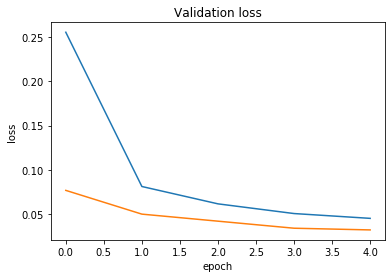

In [7]:
plt.plot(train.history['loss'], label='training loss')
plt.plot(train.history['val_loss'], label='validation loss')
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Accuracy Plot

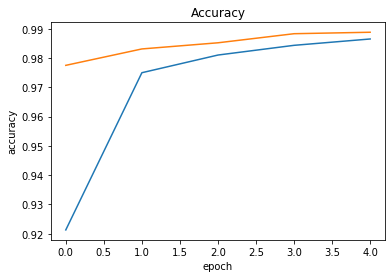

In [22]:
plt.plot(train.history['acc'], label='training accuracy')
plt.plot(train.history['val_acc'], label='validation accuracy')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Confusion Matrix

In [23]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

Confusion Matrix
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1129    1    1    1    0    1    0    2    0]
 [   2    2 1021    0    0    0    1    4    2    0]
 [   0    0    4  995    0    5    0    1    5    0]
 [   0    0    0    0  978    0    0    0    1    3]
 [   2    0    0    4    0  879    1    0    5    1]
 [   5    3    0    0    1    1  943    0    5    0]
 [   1    3    8    2    0    0    0 1011    1    2]
 [   3    0    2    0    0    0    0    1  966    2]
 [   2    3    0    1    5    3    0    3    4  988]]
Confusion matrix, without normalization
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1129    1    1    1    0    1    0    2    0]
 [   2    2 1021    0    0    0    1    4    2    0]
 [   0    0    4  995    0    5    0    1    5    0]
 [   0    0    0    0  978    0    0    0    1    3]
 [   2    0    0    4    0  879    1    0    5    1]
 [   5    3    0    0    1    1  943    0    5    0]
 [   1    3    8    2    0    0    0 1011

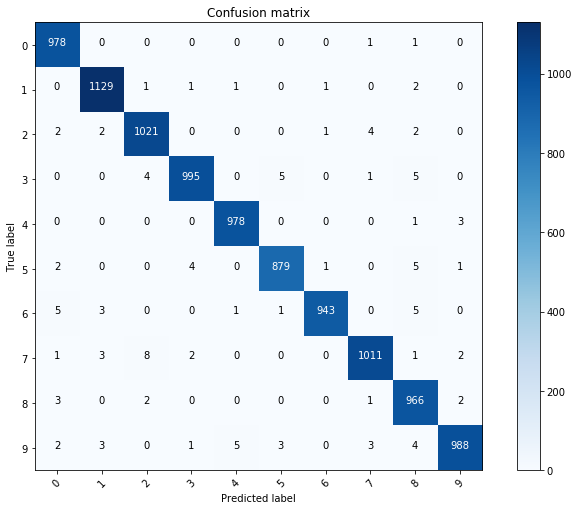

In [26]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=45)
    plt.yticks(tick_marks)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
pred = model.predict(x_test)
cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
print("Confusion Matrix")
print(cm)
plot_confusion_matrix(cm)